## Набор данных Футболисты

В качестве задания вам предлагается повторить данные действия для набора данных
- [Blood Transfusion Service Center Data Set](http://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center)

In [ ]:
import pandas as pd

Набор данных о футболистах.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/yakushinav/omo/main/data/data_football_profile.csv', sep='\t')

In [ ]:
df.columns

Index(['Name', 'Age', 'Nationality', 'Club', 'Value', 'Wage'], dtype='object')

Функция возвращает DataFrame (то есть таблицу), однако затем приобретает ещё много важных параметров, среди которых:

* sep — разделитель данных, по умолчанию ',';
* decimal — разделитель числа на целую и дробную часть, по умолчанию'.';
* names — список с названиями колонок, не обязательный параметр;
* skiprows — если файл содержит системную информацию, можно просто её пропустить. Необязательный параметр.

С помощью функции ```head``` можем посмотреть на первые несколько строк нашего датасета:

In [ ]:
df.head()

,Name,Age,Nationality,Club,Value,Wage
0,L. Messi,31.0,Argentina,FC Barcelona,110500000.0,"565000,0$"
1,NaN,33.0,Portugal,Juventus,77000000.0,"405000,0$"
2,Neymar Jr,26.0,Brazil,Paris Saint-Germain,118500000.0,"290000,0$"
3,De Gea,27.0,Spain,Manchester United,72000000.0,"260000,0$"
4,K. De Bruyne,27.0,Belgium,Manchester City,102000000.0,"355000,0$"


Удалим колонку Value, к которой мы не знаем точную интерпретацию:

In [ ]:
df.drop(['Value'], axis=1, inplace=True)

In [ ]:
# последние несколько строк:
df.tail(3)

,Name,Age,Nationality,Club,Wage
12894,NaN,16.0,England,Cambridge United,"1000,0$"
12895,D. Walker-Rice,17.0,England,Tranmere Rovers,"1000,0$"
12896,G. Nugent,16.0,England,Tranmere Rovers,"1000,0$"


Посмотрим на размер нашего датасета. Первое число – количество строк (наблюдений), второе – количество столбцов (признаков):

In [ ]:
df.shape

(12897, 5)

Если вы хотите переименовать какую-то переменную, воспользуйтесь ```rename```:

In [ ]:
df.rename({'Wage' : 'Salary'}, axis='columns', inplace=True)

In [ ]:
df.columns

Index(['Name', 'Age', 'Nationality', 'Club', 'Salary'], dtype='object')

Давайте посмотрим на информацию о датасете. В .info() можно передать дополнительные параметры, среди которых:

* verbose: печатать ли информацию о DataFrame полностью (если таблица очень большая, то некоторая информация может потеряться);
* memory_usage: печатать ли потребление памяти (по умолчанию используется True, но можно поставить либо False, что уберёт потребление памяти, либо 'deep' , что подсчитает потребление памяти более точно);
* null_counts: подсчитывать ли количество пустых элементов (по умолчанию True).

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12897 entries, 0 to 12896
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         12266 non-null  object 
 1   Age          12242 non-null  float64
 2   Nationality  12213 non-null  object 
 3   Club         12226 non-null  object 
 4   Salary       12897 non-null  object 
dtypes: float64(1), object(4)
memory usage: 503.9+ KB


Можно вывести только тип данных в каждой колонке:

In [ ]:
df.dtypes

,0
Name,object
Age,float64
Nationality,object
Club,object
Salary,object


Заметим, что зарплата у нас записана строкой.

In [ ]:
def fix_wage(x):
    # отрезаем $
    x = x[:-1]
    # меняем запятую на точку
    x = x.replace(',', '.')
    return float(x)

In [ ]:
df['Salary'] = df['Salary'].apply(fix_wage)

Метод describe показывает основные статистические характеристики данных по каждому числовому признаку (типы int64 и float64): число непропущенных значений, среднее, стандартное отклонение, диапазон, медиану, 0.25 и 0.75 квартили.

In [ ]:
df.describe()

,Age,Salary
count,12242.000000,12263.000000
mean,24.814900,7530.946750
std,4.885492,23338.219396
min,16.000000,1000.000000
25%,21.000000,1000.000000
50%,24.000000,2000.000000
75%,28.000000,4000.000000
max,45.000000,565000.000000


Чтобы посмотреть статистику по нечисловым признакам (например, по строчным (object) или булевым (bool) данным), нужно явно указать интересующие нас типы в параметре метода describe include:

In [ ]:
df.describe(include = ['object'])

,Name,Nationality,Club
count,12266,12213,12226
unique,11742,155,650
top,J. Rodríguez,England,Shonan Bellmare
freq,7,1297,30


Было бы полезно узнать, много ли у нас пропусков в датасете.

In [ ]:
df.isna().sum()
print(df.isna().sum())
print()
print("Общее количество пропусков в датасете:", df.isna().sum().sum())

Name           631
Age            655
Nationality    684
Club           671
Salary         634
dtype: int64

Общее количество пропусков в датасете: 3275


Чтобы удалить пропуски из данных, нужно вопспользоваться ```df.dropna()```, либо заполнить их значениями (например, средним) -  ```df.fillna(df['column_name'].mean())``` .
Если в датасете содержатся дубликаты строк - воспользуйтесь методом ```df.drop_duplicates()```.

In [ ]:
# заполним количественные переменные средними значениями (медианой)
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Salary'] = df['Salary'].fillna(df['Salary'].median())

# у оставшихся переменных удалим строки с пропусками
df.dropna(inplace=True)

df.isna().sum()

,0
Name,0
Age,0
Nationality,0
Club,0
Salary,0


Выведем уникальные значения по возрасту и сколько раз каждое из них встречается в датасете (по убыванию).

In [ ]:
df['Age'].value_counts()

,count
Age,
24.0,1288
21.0,876
22.0,808
20.0,786
19.0,724
23.0,715
25.0,693
26.0,688
27.0,616


Чтобы вывести уникальные значения в столбце или их количество, нужно использовать ```unique``` и ```nunique``` соответственно. Посмотрим, сколько у нас уникальных футбольных клубов.

In [ ]:
print('Всего {} футбольных клубов'.format(df['Club'].nunique()))

Всего 650 футбольных клубов


In [ ]:
df['Club'].unique()[:10]

array(['FC Barcelona', 'Paris Saint-Germain', 'Manchester United',
       'Manchester City', 'Chelsea', 'Real Madrid', 'Atlético Madrid',
       'FC Bayern München', 'Juventus', 'Liverpool'], dtype=object)

Посмотрим на среднюю зарплату по клубу:

In [ ]:
grouped = df.groupby('Club', as_index=False)['Salary'].mean()
# добавим сортировку по убыванию
grouped.sort_values(by='Salary', ascending=False)

,Club,Salary
469,Real Madrid,187500.000000
212,FC Barcelona,184722.222222
325,Juventus,148461.538462
373,Manchester City,137761.904762
134,Chelsea,103894.736842
...,...,...
531,Shamrock Rovers,1000.000000
92,Bray Wanderers,1000.000000
90,Boyacá Chicó FC,1000.000000
548,Spartak Moscow,1000.000000


Добавим еще подсчет минимума, максимума и медианы по каждой группе:

In [ ]:
df.groupby('Club')['Salary'].agg(['mean', 'min', 'max', 'median'])

,mean,min,max,median
Club,,,,
SSV Jahn Regensburg,3222.222222,1000.0,6000.0,3000.0
1. FC Heidenheim 1846,4000.000000,1000.0,14000.0,3000.0
1. FC Kaiserslautern,1454.545455,1000.0,3000.0,1000.0
1. FC Köln,9200.000000,1000.0,26000.0,4000.0
1. FC Magdeburg,3842.105263,1000.0,8000.0,4000.0
...,...,...,...,...
Zagłębie Sosnowiec,1047.619048,1000.0,2000.0,1000.0
Çaykur Rizespor,5095.238095,1000.0,13000.0,4000.0
Örebro SK,1454.545455,1000.0,2000.0,1000.0


Сгруппируем одновременно по стране и клубу:

In [ ]:
df.groupby(['Nationality', 'Club'], as_index=False)['Salary'].mean()

,Nationality,Club,Salary
0,Afghanistan,Notts County,2000.0
1,Afghanistan,SV Meppen,1000.0
2,Afghanistan,Walsall,1000.0
3,Albania,AC Ajaccio,2000.0
4,Albania,Aalborg BK,1000.0
...,...,...,...
3242,Zimbabwe,Club Brugge KV,20000.0
3243,Zimbabwe,Hobro IK,5000.0
3244,Zimbabwe,Le Havre AC,2000.0
3245,Zimbabwe,Orlando Pirates,1000.0


Добавим сортировку внутри групп:

In [ ]:
df.groupby(['Nationality', 'Club']).apply(lambda x: x.sort_values(by='Salary', ascending=False))

<ipython-input-24-bc217f3beb7c>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby(['Nationality', 'Club']).apply(lambda x: x.sort_values(by='Salary', ascending=False))


Name   Age  Nationality  \
Nationality Club                                                      
Afghanistan Notts County    10007       N. Husin  21.0  Afghanistan   
            SV Meppen       7695         H. Amin  26.0  Afghanistan   
            Walsall         8395      M. Kouhyar  20.0  Afghanistan   
Albania     AC Ajaccio      4697         Q. Laçi  22.0      Albania   
            Aalborg BK      12510      B. Bytyqi  21.0      Albania   
...                                          ...   ...          ...   
Zimbabwe    Club Brugge KV  468       M. Nakamba  24.0     Zimbabwe   
            Hobro IK        2772      Q. Antipas  34.0     Zimbabwe   
            Le Havre AC     6090     T. Kadewere  22.0     Zimbabwe   
            Orlando Pirates 6502      M. Munetsi  24.0     Zimbabwe   
            Sparta Praha    1750   C. Nhamoinesu  32.0     Zimbabwe   

                                              Club   Salary  
Nationality Club                                             
Afghanistan Notts County    10007     Notts County   2000.0  
            SV Meppen       7695         SV Meppen   1000.0  
            Walsall         8395           Walsall   1000.0  
Albania     AC Ajaccio      4697        AC Ajaccio   2000.0  
            Aalborg BK      12510       Aalborg BK   1000.0  
...                                            ...      ...  
Zimbabwe    Club Brugge KV  468     Club Brugge KV  20000.0  
            Hobro IK        2772          Hobro IK   5000.0  
            Le Havre AC     6090       Le Havre AC   2000.0  
            Orlando Pirates 6502   Orlando Pirates   1000.0  
            Sparta Praha    1750      Sparta Praha   1000.0  

[11007 rows x 5 columns]

Теперь удалим лишние колонки. Обратите внимание на обратный слэш, это line continuation character.

In [ ]:
df.groupby(['Nationality', 'Club']).apply(lambda x: x.sort_values(by='Salary', ascending=False)).\
                                                    drop(['Nationality', 'Club'], axis=1)

<ipython-input-25-d73e0ae5b3eb>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby(['Nationality', 'Club']).apply(lambda x: x.sort_values(by='Salary', ascending=False)).\


Name   Age   Salary
Nationality Club                                               
Afghanistan Notts County    10007       N. Husin  21.0   2000.0
            SV Meppen       7695         H. Amin  26.0   1000.0
            Walsall         8395      M. Kouhyar  20.0   1000.0
Albania     AC Ajaccio      4697         Q. Laçi  22.0   2000.0
            Aalborg BK      12510      B. Bytyqi  21.0   1000.0
...                                          ...   ...      ...
Zimbabwe    Club Brugge KV  468       M. Nakamba  24.0  20000.0
            Hobro IK        2772      Q. Antipas  34.0   5000.0
            Le Havre AC     6090     T. Kadewere  22.0   2000.0
            Orlando Pirates 6502      M. Munetsi  24.0   1000.0
            Sparta Praha    1750   C. Nhamoinesu  32.0   1000.0

[11007 rows x 3 columns]

Посчитаем арифметическое среднее, моду и медиану возраста футболистов (количественной переменной):

In [ ]:
print('Среднее:', round(df['Age'].mean(), 2),
      'Медиана:', df['Age'].median(),
      'Мода:', df['Age'].mode()[0])

Среднее: 24.78 Медиана: 24.0 Мода: 24.0


Для качественных переменных с помощью pandas можно вывести моду. Посмотрим на самую часто встречающуюся национальность:

In [ ]:
df['Nationality'].mode()

,Nationality
0,England


Часто возникает необходимость выбрать данные из DataFrame по определённому условию. Например, если в уже известном нам наборе данных о футболистах мы хотим выбрать только тех, у кого возраст больше 20 лет, используется следующий код:

In [ ]:
df[df.Age > 20]

,Name,Age,Nationality,Club,Salary
0,L. Messi,31.0,Argentina,FC Barcelona,565000.0
2,Neymar Jr,26.0,Brazil,Paris Saint-Germain,290000.0
3,De Gea,27.0,Spain,Manchester United,260000.0
4,K. De Bruyne,27.0,Belgium,Manchester City,355000.0
5,E. Hazard,27.0,Belgium,Chelsea,340000.0
...,...,...,...,...,...
12838,D. Mackay,21.0,Scotland,Kilmarnock,1000.0
12855,H. Norris,24.0,England,Oldham Athletic,1000.0
12861,Y. Uchimura,33.0,Japan,Hokkaido Consadole Sapporo,1000.0
12873,K. Pilkington,44.0,England,Cambridge United,1000.0


Выберем футболистов, возраст которых больше среднего возраста футболистов, при условии, что они принадлежат ФК Барселона (Club == 'FC Barcelona').

In [ ]:
df[(df.Age > df.Age.mean()) & (df.Club == 'FC Barcelona')]

,Name,Age,Nationality,Club,Salary
0,L. Messi,31.0,Argentina,FC Barcelona,565000.0
7,L. Suárez,31.0,Uruguay,FC Barcelona,455000.0
18,M. ter Stegen,26.0,Germany,FC Barcelona,240000.0
20,Sergio Busquets,29.0,Spain,FC Barcelona,315000.0
32,Coutinho,26.0,Brazil,FC Barcelona,340000.0
49,Jordi Alba,29.0,Spain,FC Barcelona,250000.0
54,Piqué,31.0,Spain,FC Barcelona,240000.0
204,J. Cillessen,29.0,Netherlands,FC Barcelona,135000.0
605,T. Vermaelen,32.0,Belgium,FC Barcelona,2000.0


Чтобы объединить данные из нескольких датасетов по ключу (общей колонке), в pandas можно воспользовать встроенными аналогами SQL методов. В метод ```join``` в качестве аргумента how нужно указать тип объединения датасетов: inner, outer, left или right.

In [ ]:
df_info = pd.read_csv('https://raw.githubusercontent.com/yakushinav/omo/main/data/data_football_info.csv', sep='\t')

joined_dfs = df_info.set_index('Name').join(df.set_index('Name'), how='inner').reset_index()
joined_dfs.head(5)

,Name,Unnamed: 0,Position,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Age,Nationality,Club,Salary
0,L. Messi,0.0,RF,84.0,95.0,NaN,90.0,86.0,97.0,93.0,...,26.0,6.0,11.0,15.0,NaN,NaN,31.0,Argentina,FC Barcelona,565000.0
1,Neymar Jr,2.0,LW,79.0,87.0,62.0,84.0,84.0,96.0,88.0,...,33.0,9.0,9.0,15.0,15.0,11.0,26.0,Brazil,Paris Saint-Germain,290000.0
2,De Gea,3.0,GK,17.0,13.0,21.0,50.0,13.0,18.0,21.0,...,13.0,90.0,85.0,87.0,88.0,94.0,27.0,Spain,Manchester United,260000.0
3,K. De Bruyne,4.0,RCM,93.0,82.0,55.0,92.0,82.0,86.0,85.0,...,51.0,15.0,13.0,5.0,NaN,13.0,27.0,Belgium,Manchester City,355000.0
4,E. Hazard,5.0,NaN,81.0,84.0,61.0,89.0,80.0,95.0,83.0,...,22.0,11.0,12.0,6.0,8.0,8.0,27.0,Belgium,Chelsea,340000.0


В качестве задания вам предлагается повторить данные действия по визуализации и классификации для набора данных
- [Blood Transfusion Service Center Data Set](http://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center)

Описание: Данные доноров крови из Центра обслуживания переливания крови.

Признаки (Features - X):
* Recency (R) – время с последнего донорства (месяцы)
* Frequency (F) – общее количество донаций
* Monetary (M) – общий объем сданной крови (в куб. см)
* Time (T) – время с первого донорства (месяцы)

Целевая переменная (Target - y):
* Donated (0/1) – пожертвовал ли донор кровь в марте 2007 года (бинарная классификация)

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# Загружаем датасет и даем ему короткое имя
btsc = fetch_ucirepo(id=176)  # Blood Transfusion Service Center

# Извлечение признаков и целевой переменной
features = btsc.data.features  # DataFrame с признаками
target = btsc.data.targets     # DataFrame с целевой переменной

# Объединение в один DataFrame
df = pd.concat([features, target], axis=1)
data = df  # Теперь данные доступны под именем 'data'

# Проверка результата
print(data.head())
print("\nСтолбцы DataFrame:", data.columns.tolist())

   Recency  Frequency  Monetary  Time  Donated_Blood
0        2         50     12500    98              1
1        0         13      3250    28              1
2        1         16      4000    35              1
3        2         20      5000    45              1
4        1         24      6000    77              0

Столбцы DataFrame: ['Recency', 'Frequency', 'Monetary', 'Time', 'Donated_Blood']


In [ ]:
data.columns

Index(['Recency', 'Frequency', 'Monetary', 'Time', 'Donated_Blood'], dtype='object')

In [ ]:
data.head()

,Recency,Frequency,Monetary,Time,Donated_Blood
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [ ]:
# Последние несколько строк:
data.tail(5)

,Recency,Frequency,Monetary,Time,Donated_Blood
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0
747,72,1,250,72,0


In [ ]:
# Размер датасета:
data.shape

(748, 5)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Recency        748 non-null    int64
 1   Frequency      748 non-null    int64
 2   Monetary       748 non-null    int64
 3   Time           748 non-null    int64
 4   Donated_Blood  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [ ]:
data.dtypes

,0
Recency,int64
Frequency,int64
Monetary,int64
Time,int64
Donated_Blood,int64


In [ ]:
data.describe()

,Recency,Frequency,Monetary,Time,Donated_Blood
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [ ]:
data.isna().sum()
print(data.isna().sum())
print()
print("Общее количество пропусков в датасете:", df.isna().sum().sum())

Recency          0
Frequency        0
Monetary         0
Time             0
Donated_Blood    0
dtype: int64

Общее количество пропусков в датасете: 0


In [ ]:
print('Recency (R) – время с последнего донорства (в месяцах)')
print('Как можно заметить, 2 и 4 месяца - самые популярные значения в датасете, так что многие доноры участвуют в сдачи крови на регулярной основе.')
print()
data['Recency'].value_counts()

Recency (R) – время с последнего донорства (в месяцах)
Как можно заметить, 2 и 4 месяца - самые популярные значения в датасете, так что многие доноры участвуют в сдачи крови на регулярной основе.



,count
Recency,
2,173
4,156
11,84
14,76
16,63
23,50
21,44
9,20
3,13


In [ ]:
print('Frequency (F) – общее количество донаций')
print('Вместе с тем, достаточно большое количство доноров участвуют в сдачи крови в первый раз.')
print()
data['Frequency'].value_counts()

Frequency (F) – общее количество донаций
Вместе с тем, достаточно большое количство доноров участвуют в сдачи крови в первый раз.



,count
Frequency,
1,158
2,112
3,87
5,62
4,62
6,52
7,43
8,31
9,24


In [ ]:
print('Monetary (M) – общий объем сданной крови (в мл)')
print('Наиболее частый объем сданной крови - ниже стандартного объема в 450-500 мл, скорее всего, эти доноры сдавали кровь впервые.')
print()
data['Monetary'].value_counts()

Monetary (M) – общий объем сданной крови (в мл)
Наиболее частый объем сданной крови - ниже стандартного объема в 450-500 мл, скорее всего, эти доноры сдавали кровь впервые.



,count
Monetary,
250,158
500,112
750,87
1250,62
1000,62
1500,52
1750,43
2000,31
2250,24


In [ ]:
print('Time (T) – время с первого донорства (месяцы)')
print('Без ярко выраженного популярного значения.')
print()
data['Time'].value_counts()

Time (T) – время с первого донорства (месяцы)
Без ярко выраженного популярного значения.



,count
Time,
4,57
16,51
14,44
2,36
23,36
...,...
12,1
55,1
3,1


Часто возникает необходимость выбрать данные из DataFrame по определённому условию. Например, в этом наборе данных выберем только тех, кто был донором крови больше 5 раз:

In [ ]:
data[data.Frequency > 5]

,Recency,Frequency,Monetary,Time,Donated_Blood
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
711,23,6,1500,45,0
713,16,6,1500,81,0
719,23,8,2000,69,0
726,25,6,1500,50,0


In [ ]:
# Для сравнения:
data[data.Frequency > 25]

,Recency,Frequency,Monetary,Time,Donated_Blood,Cluster
0,2,50,12500,98,1,0
9,5,46,11500,98,1,0
341,23,38,9500,98,0,0
500,2,43,10750,86,1,0
502,2,34,8500,77,1,0
503,2,44,11000,98,0,0
504,0,26,6500,76,1,0
505,2,41,10250,98,1,0
517,4,33,8250,98,1,0


In [ ]:
data[(data.Monetary < data.Monetary.mean()) & (data.Donated_Blood == '1')]
# Таких значений нет

,Recency,Frequency,Monetary,Time,Donated_Blood


In [ ]:
# Средний объем сданной крови (Monetary) для каждого числа донаций (Frequency)
grouped = data.groupby('Frequency', as_index=False)['Monetary'].mean()
# Сортировка по убыванию частоты донаций
grouped_sorted = grouped.sort_values(by='Frequency', ascending=False)
# Вывод результата (варианты)
print(grouped_sorted)

    Frequency  Monetary
32         50   12500.0
31         46   11500.0
30         44   11000.0
29         43   10750.0
28         41   10250.0
27         38    9500.0
26         34    8500.0
25         33    8250.0
24         26    6500.0
23         24    6000.0
22         23    5750.0
21         22    5500.0
20         21    5250.0
19         20    5000.0
18         19    4750.0
17         18    4500.0
16         17    4250.0
15         16    4000.0
14         15    3750.0
13         14    3500.0
12         13    3250.0
11         12    3000.0
10         11    2750.0
9          10    2500.0
8           9    2250.0
7           8    2000.0
6           7    1750.0
5           6    1500.0
4           5    1250.0
3           4    1000.0
2           3     750.0
1           2     500.0
0           1     250.0


In [ ]:
# Добавим еще подсчет минимума, максимума и медианы по каждой группе:
print("Вывод:")
print("Данные показывают, что для каждого значения Frequency все метрики (mean, min, max, median) одинаковы.")
print("Это означает, что в каждой группе Frequency значение Monetary не варьируется (все доноры с одинаковым Frequency сдали одинаковый объём крови)")
print()
# Группируем и считаем несколько статистик для 'Monetary' по каждой группе 'Frequency'
grouped_stats = data.groupby('Frequency', as_index=False)['Monetary'].agg(
    ['mean', 'min', 'max', 'median']).reset_index()

# Сортируем по убыванию Frequency
grouped_sorted = grouped_stats.sort_values('Frequency', ascending=False)

# Выводим результат
print(grouped_sorted)

Вывод:
Данные показывают, что для каждого значения Frequency все метрики (mean, min, max, median) одинаковы.
Это означает, что в каждой группе Frequency значение Monetary не варьируется (все доноры с одинаковым Frequency сдали одинаковый объём крови)

    index  Frequency     mean    min    max   median
32     32         50  12500.0  12500  12500  12500.0
31     31         46  11500.0  11500  11500  11500.0
30     30         44  11000.0  11000  11000  11000.0
29     29         43  10750.0  10750  10750  10750.0
28     28         41  10250.0  10250  10250  10250.0
27     27         38   9500.0   9500   9500   9500.0
26     26         34   8500.0   8500   8500   8500.0
25     25         33   8250.0   8250   8250   8250.0
24     24         26   6500.0   6500   6500   6500.0
23     23         24   6000.0   6000   6000   6000.0
22     22         23   5750.0   5750   5750   5750.0
21     21         22   5500.0   5500   5500   5500.0
20     20         21   5250.0   5250   5250   5250.0
19    

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

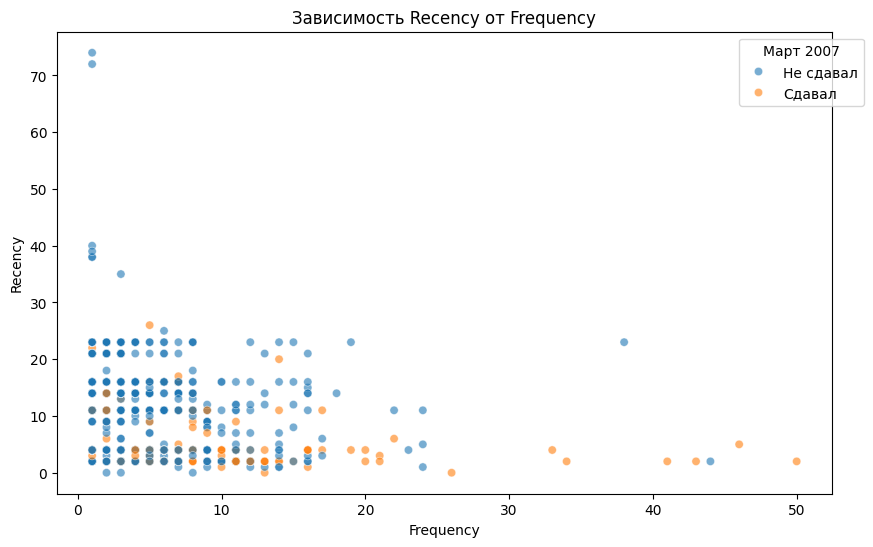

           Frequency   Recency
Frequency   1.000000 -0.182745
Recency    -0.182745  1.000000


In [ ]:
# Как время с последнего донорства (Recency) связано с общим числом донаций (Frequency)?
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Frequency', y='Recency', hue="Donated_Blood", alpha=0.6)

# Задаем кастомные названия для легенды
legend_labels = {0: 'Не сдавал', 1: 'Сдавал'}  # Соответствие значений и меток
# Обновляем легенду
plt.legend(
    title="Март 2007",
    labels=legend_labels.values(),
    handles=scatter.legend_.legend_handles,
    bbox_to_anchor=(1.05, 1)
)
plt.title('Зависимость Recency от Frequency')
plt.show()

# Корреляция
print(data[['Frequency', 'Recency']].corr())
# Слабая отрицательная связь
# Отрицательная корреляция означает, что чем больше донаций, тем меньше времени прошло с последней.

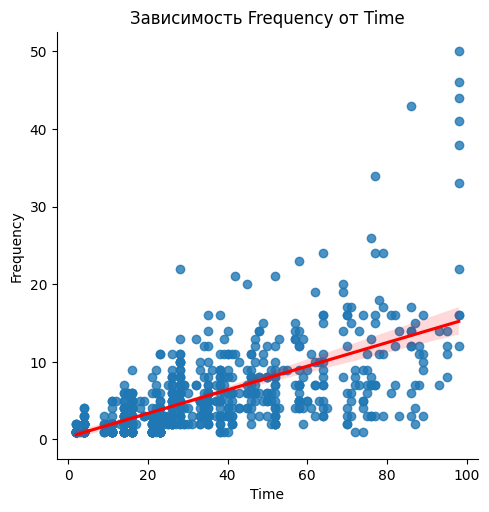

              Time  Frequency
Time       1.00000    0.63494
Frequency  0.63494    1.00000


In [ ]:
# Как время с первой донации (Time) связано с общим числом донаций (Frequency)?
# Scatter plot
sns.lmplot(data=data, x='Time', y='Frequency', line_kws={'color': 'red'})
plt.title('Зависимость Frequency от Time')
plt.show()

# Корреляция
print(data[['Time', 'Frequency']].corr())
# Чем больше Time, тем больше возможностей было для донаций, ожидается положительная корреляция

<ipython-input-90-632cc5f0ca64>:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Не сдавал', 'Сдавал'])


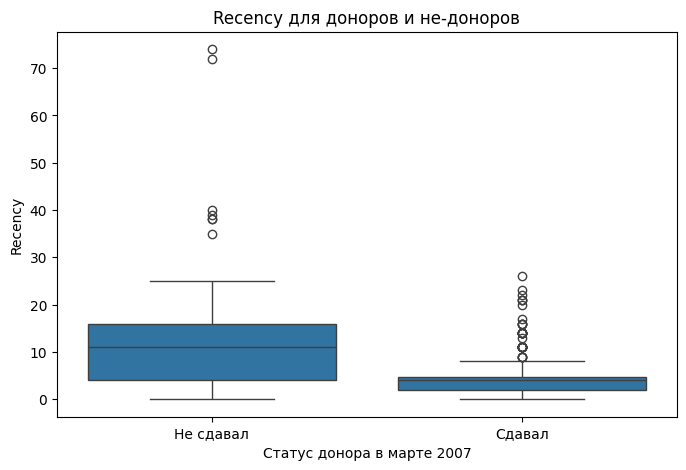


У ранее сдававших кровь доноров средний Recency меньше, значит, недавние доноры чаще сдают кровь.


<ipython-input-90-632cc5f0ca64>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Не сдавал', 'Сдавал'])


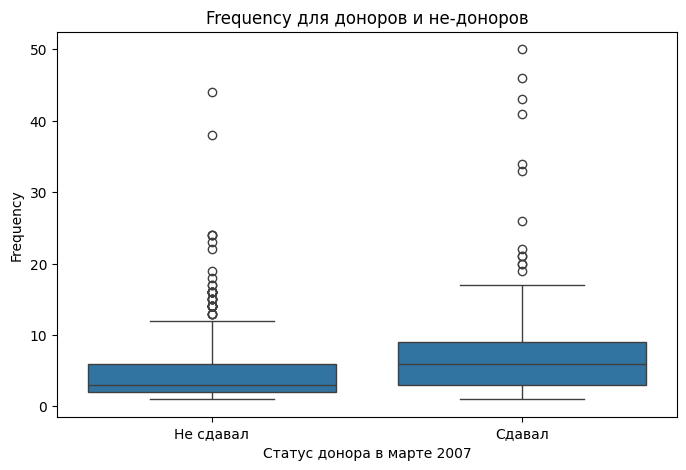


У ранее сдававших кровь средний Frequency выше, значит, активные доноры чаще возвращаются.


In [ ]:
# Распределение Recency для двух классов
# Boxplot для Recency
plt.figure(figsize=(8, 5))
ax = sns.boxplot(data=data, x='Donated_Blood', y='Recency')
ax.set_xticklabels(['Не сдавал', 'Сдавал'])
plt.title('Recency для доноров и не-доноров')
plt.xlabel('Статус донора в марте 2007')
plt.show()
print()
print("У ранее сдававших кровь доноров средний Recency меньше, значит, недавние доноры чаще сдают кровь.")

# Boxplot для Frequency
plt.figure(figsize=(8, 5))
ax = sns.boxplot(data=data, x='Donated_Blood', y='Frequency')
ax.set_xticklabels(['Не сдавал', 'Сдавал'])
plt.title('Frequency для доноров и не-доноров')
plt.xlabel('Статус донора в марте 2007')
plt.show()
print()
print("У ранее сдававших кровь средний Frequency выше, значит, активные доноры чаще возвращаются.")

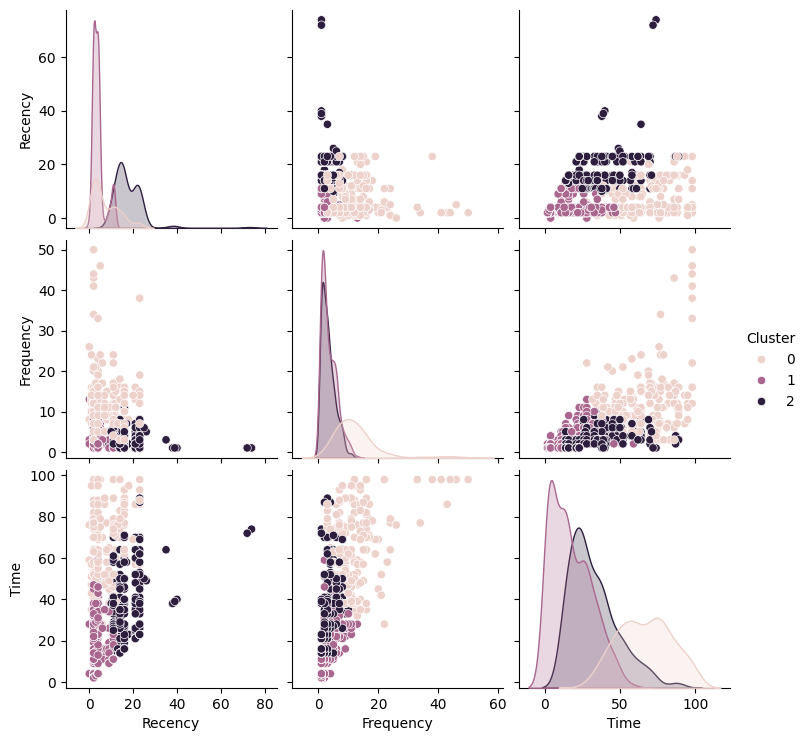

In [ ]:
from sklearn.cluster import KMeans

# Нормализация данных
from sklearn.preprocessing import StandardScaler
X = data[['Recency', 'Frequency', 'Time']]
X_scaled = StandardScaler().fit_transform(X)

# Кластеризация
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Визуализация
sns.pairplot(data, vars=['Recency', 'Frequency', 'Time'], hue='Cluster')
plt.show()

# Кластер 0: Редкие доноры с высоким Recency.
# Кластер 1: Активные доноры (низкий Recency, высокий Frequency).
# Кластер 2: Новые доноры (малый Time, но растущий Frequency).